In [1]:
import argparse
import h5py
from os import walk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import time

In [37]:
def similarity_score_sum_of_7th(avg, graph):
    diff = np.absolute(avg-graph)
    diff*=10
    diff = diff**7
    return np.sum(diff) / len(diff) / 10

def drop_bad_data(average,cuts):
    updated_cuts = []
    for cut in cuts:
        sim = similarity_score_sum_of_7th(average, cut)
        if sim < 0.025:
            updated_cuts.append(cut)
    return np.array(updated_cuts)

In [3]:
full_beats = np.load('Heartbeats_normalized.npy').astype(np.float16)

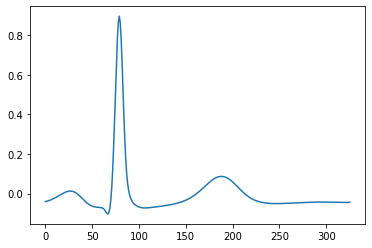

In [9]:
average = np.array(full_beats).mean(axis=0)
x_axis = np.arange(len(average))
plt.plot(x_axis, average)

In [27]:
tight_data = drop_bad_data(average, full_beats)
print(tight_data.shape)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


(58648, 326)


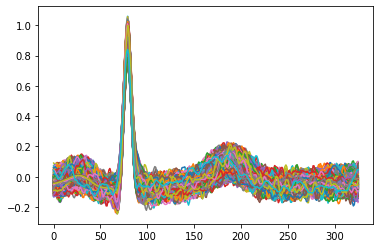

In [28]:
for beat in tight_data[0:1000]:
    plt.plot(x_axis, beat)

In [50]:
averaged_sets = []
j = 0
k = 1000
for i in range(int((full_beats.shape[0] - full_beats.shape[0]%1000)/1000)):
    averaged_sets.append(full_beats[j:k].mean(axis=0))
    j += 1000
    k += 1000

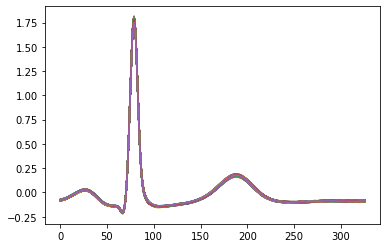

In [54]:
averaged_sets = np.array(averaged_sets[1:len(averaged_sets)])
for beat in averaged_sets:
    plt.plot(x_axis, beat)

In [55]:
np.save('tight_bound_beats.npy', np.array(tight_data))
np.save('averaged_sets.npy', averaged_sets)

In [58]:
ex = np.load('Heartbeats.npy')

In [60]:
ex.shape

(616582, 326)